In [1]:
# Ensure src is in the import path
import os
import sys

project_root = os.path.abspath("..")
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# Import damage classes
from maskerada import (ScratchDamage, WaterDiscolouration, CraquelureDamage, NoDamage)

# Load the sample image

In [7]:
# Load the base image
input_path = os.path.join(project_root,
                          "data", 
                          "sample-image-canvas-oil-Le-Moulin-de-la-Galette-1876.png")
original_image = Image.open(input_path).convert("RGB")

# Apply the damages

In [8]:
# Define damage versions
damage_versions = [
    [ScratchDamage()],
    [WaterDiscolouration()],
    [CraquelureDamage()],
]

# Generate images
outputs = []
for pipeline in damage_versions:
    img = original_image.copy()
    for dmg in pipeline:
        img, mask = dmg.apply(img)
    outputs.append(img)
    outputs.append(mask)

# Visualize the damages

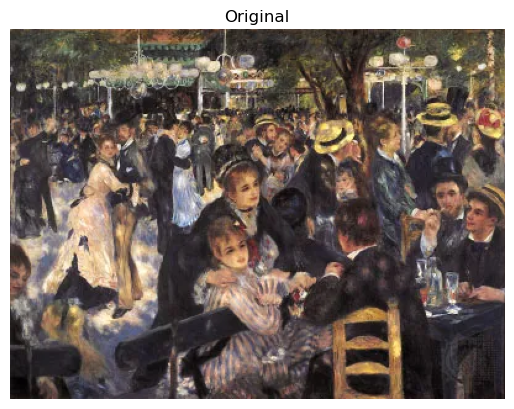

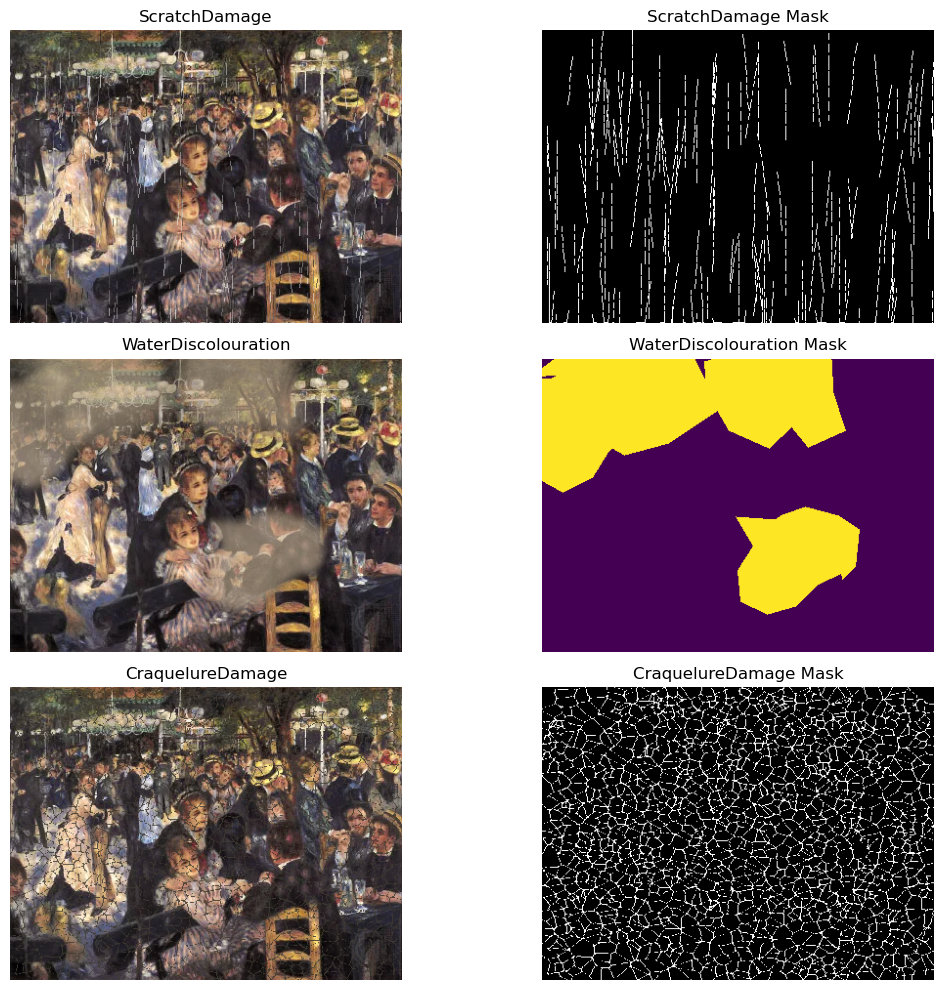

In [9]:
titles = [
    "ScratchDamage",
    "ScratchDamage Mask",
    "WaterDiscolouration",
    "WaterDiscolouration Mask",
    "CraquelureDamage",
    "CraquelureDamage Mask",
]

# Plot with matplotlib
plt.imshow(original_image)
plt.title("Original")
plt.axis("off")

# Plot as grid
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(outputs[i])
    ax.set_title(titles[i])
    ax.axis("off")

plt.tight_layout()
plt.show()